In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import matplotlib as mp
mp.style.use('classic')

# Read simulation files
def datafileread(measurename,skipfirstrows,delim=','):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter=delim,
                        dtype=(float,float),
                        unpack=True)
    return data

# Read simulation files saved from numpy
def numpyread(measurename):
    # Reading Datafiles
    path = measurename
    data = np.loadtxt(path,delimiter='\t')
    return data

# Sensor output
name = 'transient_waveform.csv'
a,b,c,time,voltage = datafileread(name,7)

# TLP input
name = 'reference_waveform.csv'
tref,vref,iref = datafileread(name, 1,delim='\t')

# reconstructed TLP current
name = 'output_integral.csv'
time_rec,current_rec = numpyread(name)

time *= 1e9
tref *= 1e9
time_rec *= 1e9

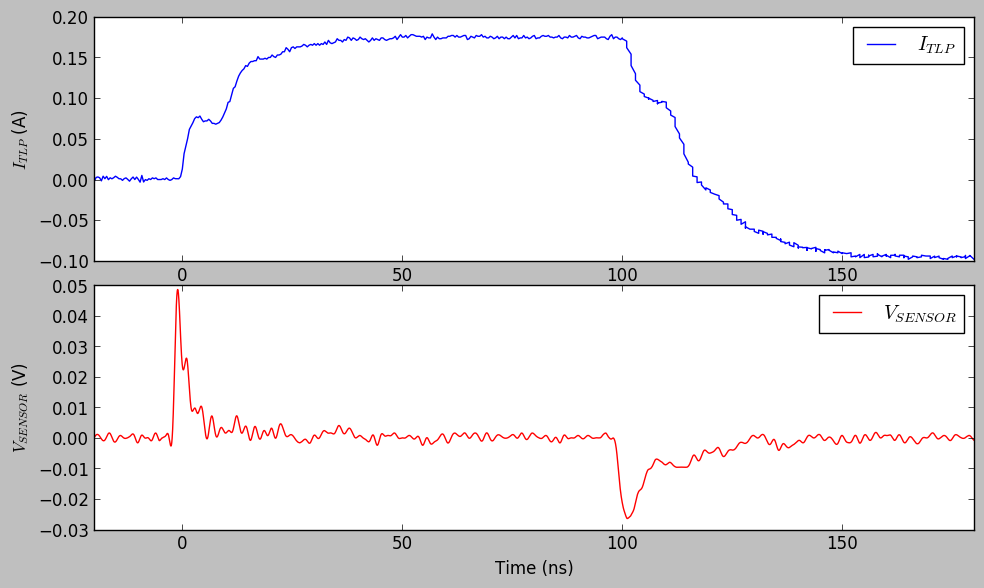

In [6]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(10,6))

#
ax1.plot(tref,iref, label='$I_{TLP}$')
ax1.set_xlim([tref[0], tref[-1]])
ax1.set_ylabel('$I_{TLP}$ (A)')
ax1.legend(loc='best')
#
ax2.plot(time,voltage,'r', label="$V_{SENSOR}$")
ax2.set_xlim([tref[0], tref[-1]])
ax2.set_xlabel('Time (ns)')
ax2.set_ylabel('$V_{SENSOR}$ (V)')
ax2.legend(loc='best')
#
plt.tight_layout()
f.subplots_adjust(hspace=0.1)
plt.savefig("../../src/3/figures/measured_waveform.png", pad_inches=0.3)
plt.show()

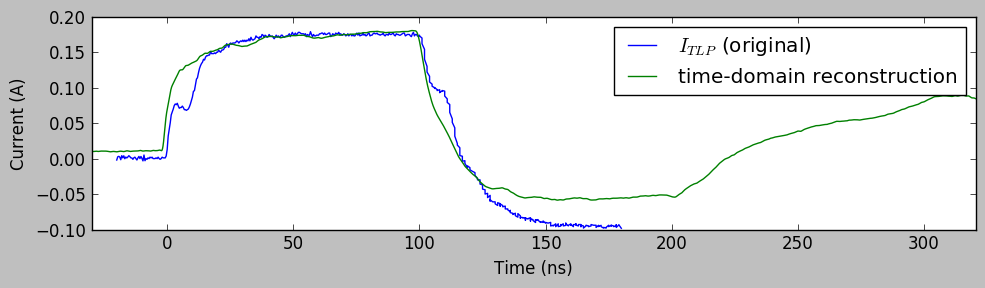

In [14]:
plt.figure(figsize=(10,3))
plt.plot(tref,iref, 'b', label="$I_{TLP}$ (original)")
plt.plot(time_rec,current_rec, 'g', label="time-domain reconstruction")
#plt.title('Time-domain method for waveform reconstruction vs reference waveform')
plt.xlabel('Time (ns)')
plt.xlim([-30, time[-1]])
plt.ylabel('Current (A)')
plt.legend(loc='best')
#
plt.tight_layout()
plt.savefig("../../src/3/figures/time_domain_vs_ref.png", pad_inches=0.3)
plt.show()